# Workshop Python Image Analysis
*Martijn Wehrens, September 2025*



## Answers to exercises 03

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tifffile as tiff
import numpy as np

import skimage as sk
from scipy import stats
from scipy import ndimage

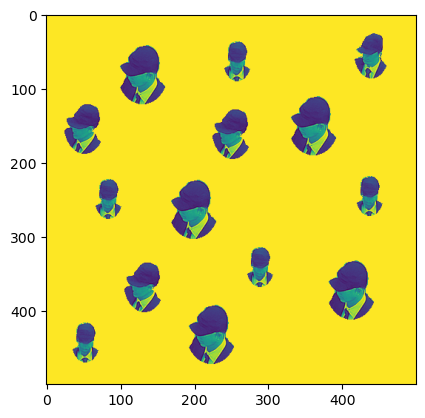

In [ ]:
# Dodgy guys

# Load the picture `images/car/dodgy-guys.tif`
img_dodgy = tiff.imread('../images/car/dodgy-guys.tif')
_=plt.imshow(img_dodgy)

In [ ]:
# Can you count the amount of dodgy guys with python?
mask_dodgy_inv = np.max(img_dodgy)-img_dodgy
mask_dodgy = mask_dodgy_inv>2
labeledmask_dodgy = sk.measure.label(mask_dodgy)
np.max(labeledmask_dodgy)

np.int32(14)

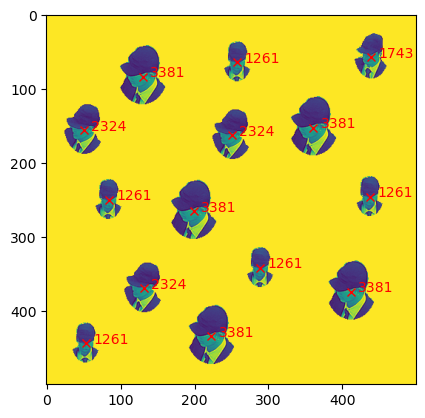

In [26]:
# Can you identify where they are in the image (put a cross in a plot)?
regions_dodgy = sk.measure.regionprops(labeledmask_dodgy)
centroids_dodgy = np.array([r.centroid for r in regions_dodgy])
_=plt.imshow(img_dodgy)
_=plt.plot(centroids_dodgy[:,1], centroids_dodgy[:,0], 'xr')
# Can you put the sizes of each of the heads on top of their heads in a plot?
sizes_dodgy = np.array([r.area for r in regions_dodgy])
for i, size in enumerate(sizes_dodgy):
    plt.text(centroids_dodgy[i,1]+10, centroids_dodgy[i,0], str(round(size)), color='red')


In [28]:
# Can you now easily spot which of the faces only occurs once in this image?
np.unique(sizes_dodgy, return_counts=True)

(array([1261., 1743., 2324., 3381.]), array([5, 1, 3, 5]))